## Brooklyn Data Science statistics test

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Question 1

In [6]:
heights = np.array([178, 163, 168, 167, 170, 150])

In [7]:
h_df = pd.DataFrame(heights)

In [8]:
h_df.describe()

,0
count,6.000000
mean,166.000000
std,9.273618
min,150.000000
25%,164.000000
50%,167.500000
75%,169.500000
max,178.000000


In [9]:
# part c: IQR
IQR = 169.5 - 164
IQR

5.5

In [15]:
mean = heights.mean()
mean

166.0

In [18]:
samp_sd = heights.std(ddof=1)
samp_sd

9.2736184954957039

In [21]:
# part d: outliers:
mean_minus2sd = mean - 2 * samp_sd
mean_plus2sd = mean + 2 * samp_sd
print "mean +- 2 s.d. range: [{} {}]".format(mean_minus2sd, mean_plus2sd)

mean +- 2 s.d. range: [147.452763009 184.547236991]


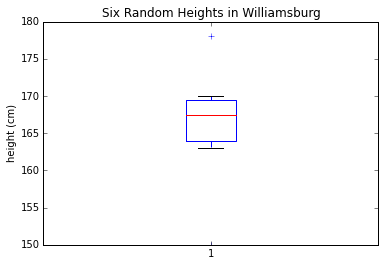

In [25]:
plt.boxplot(heights)
plt.title("Six Random Heights in Williamsburg")
plt.ylabel("height (cm)")

In [26]:
# part f: sample variance
samp_var = samp_sd**2
samp_var

86.0

## Question 10

In [39]:
num_rn = 10000
zero_to_one = 0
for _ in range(num_rn):
    rn = np.random.normal()
    if ((rn >= 0) & (rn <= 1)):
        zero_to_one +=1

In [40]:
from __future__ import division
density = float(zero_to_one/num_rn)
density

0.3446

## Question 12

In [42]:
index_a = [1,2,3,4,5,6,7,8,9,10,11,12,13]
index_b = [1,2,3,4,5,6,7,8]

In [44]:
data = {'Method A': pd.Series([79.98,80.04, 80.02,80.04,80.03,80.03,80.04,79.97,80.05,80.03,80.02,80.00,80.02], index=index_a),
       'Method B': pd.Series([80.02,79.94,79.98,79.97,79.97,80.03,79.95,79.97], index=index_b)}
df = pd.DataFrame(data)

In [45]:
df

,Method A,Method B
1,79.98,80.02
2,80.04,79.94
3,80.02,79.98
4,80.04,79.97
5,80.03,79.97
6,80.03,80.03
7,80.04,79.95
8,79.97,79.97
9,80.05,NaN
10,80.03,NaN


In [46]:
df.describe()

,Method A,Method B
count,13.000000,8.000000
mean,80.020769,79.978750
std,0.023966,0.031368
min,79.970000,79.940000
25%,80.020000,79.965000
50%,80.030000,79.970000
75%,80.040000,79.990000
max,80.050000,80.030000


## Question 13

In [48]:
data = pd.Series([1668,1407,1370,1309,1341,1338,1406,1446,1332,1363,1410,1526])
df = pd.DataFrame(data, columns=['Bookings'])

In [50]:
df.index = (pd.date_range(start='1/1', end='12/1', freq='MS'))

In [52]:
df.head(12)

,Bookings
2016-01-01,1668
2016-02-01,1407
2016-03-01,1370
2016-04-01,1309
2016-05-01,1341
2016-06-01,1338
2016-07-01,1406
2016-08-01,1446
2016-09-01,1332
2016-10-01,1363


In [56]:
book_sum = df.Bookings.sum()
book_sum

16916

In [57]:
sum_per_month = book_sum/12.0
sum_per_month

1409.6666666666667

In [58]:
df['chi-square'] = ((df.Bookings-sum_per_month)**2/sum_per_month)

In [59]:
df.head(12)

,Bookings,chi-square
2016-01-01,1668,47.341767
2016-02-01,1407,0.005045
2016-03-01,1370,1.116182
2016-04-01,1309,7.188776
2016-05-01,1341,3.344841
2016-06-01,1338,3.643493
2016-07-01,1406,0.009537
2016-08-01,1446,0.936470
2016-09-01,1332,4.279105
2016-10-01,1363,1.544888


In [61]:
chi_sum = df['chi-square'].sum()
chi_sum

79.010640813431053

## Question 14

In [62]:
data = {'X1': pd.Series([16,12,13,11,10,9,8,7,5,3,2,0]),
       'X2': pd.Series([8,10,6,2,8,-1,4,6,-3,-1,-3,0])}
pca_df = pd.DataFrame(data)
pca_df.head()

,X1,X2
0,16,8
1,12,10
2,13,6
3,11,2
4,10,8


In [67]:
corr = np.corrcoef(pca_df.X1, pca_df.X2)[0,1]
print "The correlation between X1 and X2 is {}".format(corr)

The correlation between X1 and X2 is 0.745620301126


In [68]:
from sklearn.decomposition import PCA

In [80]:
# Part b: Eigenvectors of covariance matrix
_ , eigenvectors = np.linalg.eig(np.cov(pca_df.transpose()))
eigenvectors

array([[ 0.72823813, -0.68532417],
       [ 0.68532417,  0.72823813]])

In [89]:
pca = PCA(n_components=2)
pca.fit(pca_df)

PCA(copy=True, n_components=2, whiten=False)

In [90]:
# Part c: variance of principle components
pca.explained_variance_

array([ 35.36116217,   5.13883783])

In [91]:
# Part d: overall variability explained by a single principal
# component
pca.explained_variance_ratio_

array([ 0.87311512,  0.12688488])